In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt




# create a "symbol" called x
x = Symbol('x')


# function: 2*(x-8)^4+3*(y-0)^2
# function: Max(x-8,0)+3*|y-0|

In [2]:

class function_A():
    def f(self, x, y):
        return 2*(x-8)**4+3*(y-0)**2
    def dfdx(self, x):
        return 8*(x-8)**3
    def dfdy(self, y):
        return 6*(y-0)


In [4]:
#function: Max(x-8,0)+3*|y-0|
class function_B():
    def f(self, x, y):
        return np.maximum(x - 8, 0) + 4 * np.absolute(y - 0)# function value f(x)
    def dfdx(self, x):
        if x-8>0:
            return 1
        else:
            return 0
    def dfdy(self, y):
        return 4*np.sign(y)


In [5]:
#f(x,y) = x**2 + 10*y**2
class function_C():
    def f(self, x, y):
        return x**2 + 10*y**2
    def dfdx(self, x):
        return 2*x
    def dfdy(self, y):
        return 20*y

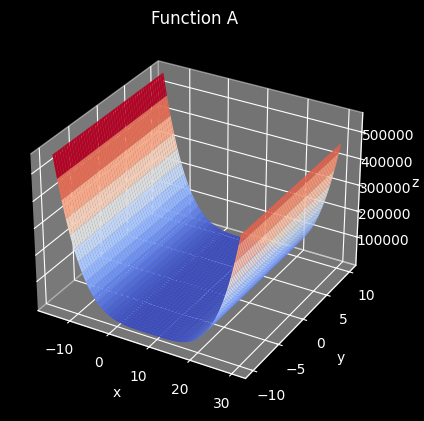

In [64]:

x_range = np.linspace(-15, 30, 100)
y_range = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x_range, y_range)

fn_A = function_A()


Z = fn_A.f(X, Y)



# plot the function as a surface
fig = plt.figure()
plt.style.use('dark_background')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Function A')
plt.show()




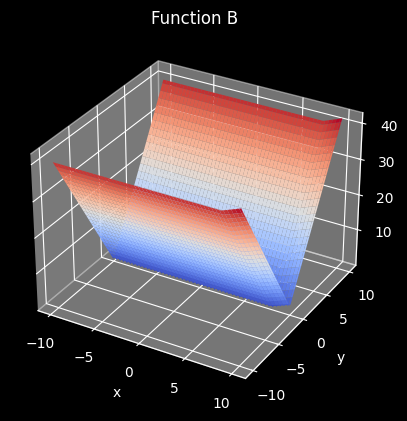

In [63]:
#plot function B

x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x_range, y_range)

fn_B = function_B()
Z = fn_B.f(X, Y)

# plot the function as a surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Function B')
plt.show()	



In [7]:
def gradDescent(fn,x0,alpha,num_iters):
    x=x0[0]; # initial value
    y=x0[1];

    X=np.array([x]); 
    F=np.array(fn.f(x,y));
    for k in range(num_iters):
        step = alpha*fn.df(x)
        x = x - step
        X=np.append(X,[x],axis=0); # x
        F=np.append(F,fn.f(x,y)) # f(x)
    return (X,F)


In [67]:
def gradDescent_2d(fn,start,alpha,num_iters):
    
    x=start[0]; # initial value
    y=start[1];
    X=np.array([x]); 
    Y=np.array([y]);
    F_xy=np.array(fn.f(x, y));


    for k in range(num_iters):
        step_x = alpha*fn.dfdx(x) 
        step_y = alpha*fn.dfdy(y)
        x = x - step_x # update x 
        y = y - step_y # update y
        X=np.append(X,[x],axis=0); # x      
        Y=np.append(Y,[y],axis=0); # y
        F_xy=np.append(F_xy,[fn.f(x, y)]); # f(x,y)
    return (X,Y, F_xy)

In [68]:
def gradDescent_2d_Polyak(fn,start,alpha,num_iters, reg):

    x=start[0]; # initial value
    y=start[1];

    X=np.array([x]); 
    Y=np.array([y]);
    F_xy=np.array(fn.f(x, y));
    sum_x = 0;
    sum_y = 0;

    for k in range(num_iters):
        #df/dx
        sum_x += fn.dfdx(x)
        
        n_x = fn.f(x, y)/(sum_x)**2 
        #df/dy
        sum_y += fn.dfdy(y)
        n_y = fn.f(x, y)/(sum_y)**2

        x = x -n_x*fn.dfdx(x)# update x 
        y = y -n_y*fn.dfdy(y)# update y


        X=np.append(X,[x],axis=0); # x      
        Y=np.append(Y,[y],axis=0); # y
        F_xy=np.append(F_xy,[fn.f(x, y)]); # f(x,y)

      
        

    return (X,Y, F_xy)


In [69]:
def gradDescent_2d_RMSProp(fn,start,alpha,num_iters, reg, beta):

    x=start[0]; # initial value
    y=start[1];

    X=np.array([x]); 
    Y=np.array([y]);
    F_xy=np.array(fn.f(x, y));
    step_X = []
    step_Y = []	
    sum_x = 0; sum_y = 0 ;
    alpha_x, alpha_y = alpha




    for k in range(num_iters):
        step_x = alpha_x*fn.dfdx(x) #step size for x
        step_y = alpha_y*fn.dfdy(y) # step size for y
        

        step_X.append(step_x)
        step_Y.append(step_y)
       
        x = x - step_x
        y = y - step_y
        sum_x = beta*sum_x + (1-beta)*(fn.dfdx(x))**2
        alpha_x = alpha_x/(np.sqrt(sum_x)+reg)
        sum_y = beta*sum_y + (1-beta)*(fn.dfdy(y))**2
        alpha_y = alpha_y/(np.sqrt(sum_y)+reg)


        X=np.append(X,[x],axis=0); # x      
        Y=np.append(Y,[y],axis=0); # y
        F_xy=np.append(F_xy,[fn.f(x, y)]); # f(x,y)
        
        

    return (X,Y, F_xy, step_X, step_Y)

In [70]:
#heavy ball
def gradDescent_2d_HeavyBall(fn,start,alpha,num_iters, reg, beta):
    
    x=start[0]; # initial value
    y=start[1];
    
    z = 0
    j = 0
   
    X=np.array([x]); 
    Y=np.array([y]);
    F_xy=np.array(fn.f(x, y));

    for k in range(num_iters):
        delta_x = fn.dfdx(x)
        delta_y = fn.dfdy(y)
       
        
        z = beta*z + alpha*delta_x
        j = beta*z + alpha*delta_y
       

        x = x - z
        y = y - j
        

        X=np.append(X,[x],axis=0);
        Y=np.append(Y,[y],axis=0);
        F_xy=np.append(F_xy,[fn.f(x, y)]);

    

    return (X,Y, F_xy)


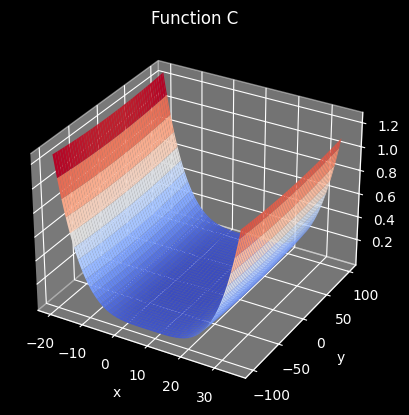

C:\Users\dan\AppData\Local\Temp\ipykernel_15612\3382152416.py:3: RuntimeWarning: overflow encountered in double_scalars
  return 2*(x-8)**4+3*(y-0)**2
C:\Users\dan\AppData\Local\Temp\ipykernel_15612\3382152416.py:5: RuntimeWarning: overflow encountered in double_scalars
  return 8*(x-8)**3
C:\Users\dan\AppData\Local\Temp\ipykernel_15612\3759595714.py:13: RuntimeWarning: invalid value encountered in double_scalars
  x = x - step_x # update x


TypeError: cannot unpack non-iterable int object

In [71]:
fn = function_A()

x_range = np.linspace(-20, 35, 100)
y_range = np.linspace(-100, 100, 100)
A, B = np.meshgrid(x_range, y_range)

# create a 2D array of function values
Z= fn.f(A, B)
# plot the function as a surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(A, B, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Function C')
plt.show()


start = np.array([3,3])

alpha = 0.075
num_iters = 10
reg = 0.0001
beta = 0.9
# X,F_x = gradDescent(fn_1,start,alpha,num_iters)
# Y,F_y = gradDescent(fn_2,start,alpha,num_iters)

# #cost function


(X, Y, F_xy) = gradDescent_2d(fn,start,alpha,num_iters)
(X_1, Y_1, F_xy_1) = gradDescent_2d_Polyak(fn,start,alpha,num_iters, reg)
(X_2, Y_2, F_xy_2) = gradDescent_2d_RMSProp(fn,start,alpha,num_iters, reg, beta )
#(X_3, Y_3, F_xy_3) = gradDescent_2d_HeavyBall(fn,start,alpha,num_iters, reg, beta )


# #plot of funciton
fig = plt.figure()

plt.plot(X, 'r-', label = 'alpha constant')
# plt.plot(X_1, 'b-', label = 'Polyak')
plt.plot(X_2, 'g-', label = 'RMSProp')
#plt.plot(X_3, 'p-', label = 'Heavy ball')
plt.ylabel('x')
plt.xlabel('iterations')
plt.legend()
plt.show()






fig = plt.figure()
plt.style.use('dark_background')
plt.contour(A, B, Z, 100, cmap='coolwarm')
# plt.plot(X, Y,  'r-', label = r'alpha constant, $\alpha$ = %s' % alpha)
# plt.plot(X_3, Y_3,  'p-', label = 'Heavy ball')


# plt.plot(X_3, Y_3,  'p-', label = 'Heavy ball')
# plt.plot(X_1, Y_1, 'b-', label = 'Polyak')
# plt.plot(X_2, Y_2, 'g-', label = 'RMSProp')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

plt.show()



In [ ]:
print ('x',X_1)
print ('y',Y_1)


x [1.5        1.49999887 1.49999774 1.4999966  1.49999547 1.49999434
 1.49999321 1.49999208 1.49999095 1.49998981 1.49998868]
y [1.5        1.49998868 1.49997737 1.49996605 1.49995473 1.49994341
 1.4999321  1.49992078 1.49990946 1.49989814 1.49988683]
